# Exploratory Data Analysis

## Import packages

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)


## Functions

This section brings together all our user-defined functions we'll use throughout this document. These functions address three main areas:
- Data Completeness and Missing Values: These help identify and handle missing data issues that might affect our analysis.
- Data Formatting and Type Consistency: These ensure that our data is formatted consistently and uses the correct data types for accurate analysis.
- Visualization Support: Inspired by the BCQ starter kit, these functions help create clear and informative visualizations.

In [2]:
#### Helper functions
# get name of df
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [3]:
# User defined functions
# Set path for scripts folder
path_scripts = os.path.abspath(os.path.join(os.getcwd(), "..", "scripts"))
sys.path.append(path_scripts)
import data_cleaning
import data_visualization

---

## Load
We load the data with `convert_types()` to ensure precise data type definitions.

In [4]:
# Set path for data folder
path_data = os.path.abspath(os.path.join(os.getcwd(), "..", "data"))

# load data
client_df = pd.read_csv(os.path.join(path_data,"raw","client_data.csv")).convert_dtypes()
price_df = pd.read_csv(os.path.join(path_data,"raw","price_data.csv")).convert_dtypes()

We use `info()` and `head()` to get a basic understanding of our two main datasets: `client_df` and `price_df`.

**Main Takeaways:**

* **Size:** `client_df` has 26 columns and 14606 rows, while `price_df` has 8 columns and 193002 rows.

* **Content:** `client_df` holds client characteristics, while `price_df` is a time series of prices.

* **Connection:** Both data frames share a primary key named `id`.

* **Missing Values:** While initial inspection suggests no missing values (non-null count equals entries), further analysis might reveal imputed values.

* **Date Format:** Date columns in both data frames are currently strings and need conversion to datetime format.

* **Data Types:** `price_df` contains mostly numerical data (besides date data and `id`), while `client_df` has a combination of numerical and categorical data.

* **Categorical Variables in `client_df`:**
    * **Dichotomous:** Variables like `churn` and `has_gas` are currently stored as integer and string, respectively. We'll convert them to booleans to improve readability and consistency.
    * **Nominal:** Columns like `channel_sales` and `origin_up` have nominal categorical data. We'll convert them to the `categorical` type for better handling and readability.

In [5]:
client_df.info(verbose=True, max_cols=30)
client_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  string 
 1   channel_sales                   14606 non-null  string 
 2   cons_12m                        14606 non-null  Int64  
 3   cons_gas_12m                    14606 non-null  Int64  
 4   cons_last_month                 14606 non-null  Int64  
 5   date_activ                      14606 non-null  string 
 6   date_end                        14606 non-null  string 
 7   date_modif_prod                 14606 non-null  string 
 8   date_renewal                    14606 non-null  string 
 9   forecast_cons_12m               14606 non-null  Float64
 10  forecast_cons_year              14606 non-null  Int64  
 11  forecast_discount_energy        14606 non-null  Int64  
 12  forecast_meter_rent_12m         

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.8,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.6,28.6,1,6.6,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [6]:
price_df.info()
price_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  string 
 1   price_date          193002 non-null  string 
 2   price_off_peak_var  193002 non-null  Float64
 3   price_peak_var      193002 non-null  Float64
 4   price_mid_peak_var  193002 non-null  Float64
 5   price_off_peak_fix  193002 non-null  Float64
 6   price_peak_fix      193002 non-null  Float64
 7   price_mid_peak_fix  193002 non-null  Float64
dtypes: Float64(6), string(2)
memory usage: 12.9 MB


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Data cleaning and preparation

### Data quality: Completeness and Missing values

This section focuses on finding and handling missing values in the categorical columns.

We use the `channel_sales` column as our starting point. The output of `head()` below shows that it has a value of `"MISSING"` to indicate missing data (NA). We'll check if other categorical columns use similar values (e.g., "NA", "Unknown") to represent NA.

Since categorical data in these columns is stored as hashed text strings (refer to the data's documentation), they usually have a fixed length. We leverage this characteristic to identify missing values. We compare the length of each string to the maximum length within the column. Entries with a shorter length might indicate missing values that have been hashed with a special value. In contrast, we consider that if all values share the same length, NA are absent.

All values identified correspond to 'MISSING'. Therefore, we replace these values with `np.nan` for consistency.

In [7]:
client_df[client_df.select_dtypes(include=['string']).columns].head(3)

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,has_gas,origin_up
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,2013-06-15,2016-06-15,2015-11-01,2015-06-23,t,lxidpiddsbxsbosboudacockeimpuepw
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,2009-08-21,2016-08-30,2009-08-21,2015-08-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,2010-04-16,2016-04-16,2010-04-16,2015-04-17,f,kamkkxfxxuwbdslkwifmmcsiusiuosws


**First**, we iterate through all string columns in both dataframes to identify inconsistencies in string lengths and discover which values represent missing data (NA) in these columns.

Our assessment reveals that only `client_df` has missing values, while `price_df` is complete. In both the `channel_sales` and `origin_up` columns within `client_df`, the value `"MISSING"` is used to indicate missing data.


In [8]:
cols_string_missing_values = []
for df in (client_df, price_df):
    cols_string_inconsistent = []
    for col in df.select_dtypes(include=['string']).columns:
        if max(df[col].str.len()) != min(df[col].str.len()):
            cols_string_inconsistent.append(col)
        else:
            continue
    if cols_string_inconsistent:
        for col in cols_string_inconsistent:
            print(f"{get_df_name(df)}:{col} has inconsistent string length: max {max(df[col].str.len())}, min {min(df[col].str.len())}")
    else:
        print(f"{get_df_name(df)} has no inconsistent columns")

    for col in cols_string_inconsistent:
        col_min = min(df[col].str.len())
        client_subset_loop = df[df[col].str.len() == col_min]
        cols_string_missing_values.extend(list(client_subset_loop[col].unique()))
        print(f"{get_df_name(df)}:{col}, strings of min length: {list(client_subset_loop[col].unique())}")
print(f"\nUnique values denoting NA in all string columns of all dfs: {list(set(cols_string_missing_values))}")


client_df:channel_sales has inconsistent string length: max 32, min 7
client_df:origin_up has inconsistent string length: max 32, min 7
client_df:channel_sales, strings of min length: ['MISSING']
client_df:origin_up, strings of min length: ['MISSING']
price_df has no inconsistent columns

Unique values denoting NA in all string columns of all dfs: ['MISSING']


**Second**, we replace missing values. We employ our custom `replace_unknown_object_cols()` function to replace the string 'MISSING' with `np.nan`in the columns identified earlier. This ensures consistent representation of missing data.

**Third**, we assess missingness prevalence. We use our custom function `prevalence_missingness()` to analyze the percentage of missing values in each column of both dataframes. The analysis reveals a high proportion of missing values (around 25%) in the `channel_sales` column, while the `origin_up` column has very few missing values (less than 1%).

In [9]:
client_df = data_cleaning.replace_unknown_object_cols(client_df, cols_string_missing_values).copy()
data_cleaning.prevalence_missingness(client_df)

,col_name,prevalence_na
0,id,0.00
1,channel_sales,25.50
2,cons_12m,0.00
3,cons_gas_12m,0.00
4,cons_last_month,0.00
5,date_activ,0.00
6,date_end,0.00
7,date_modif_prod,0.00
8,date_renewal,0.00
9,forecast_cons_12m,0.00


**Fourth**, we address the relative high prevalence of NA in the `channel_sales` column.  We consider two approaches to tackle this issue:

   - **Option 1: Drop the Column:** This approach prioritizes keeping all observations in the dataset (maximizing sample size) even if it means removing the `channel_sales` column entirely.
   - **Option 2: Drop Observations with Missing Values:** This approach prioritizes keeping the `channel_sales` column (preserving the information it provides) even if it means removing some observations from the dataset (reducing sample size).

We choose the second option for the following two reasons:

   - The relatively large initial sample size of the `client_df` dataframe (14,606 rows) allows for some reduction without significantly impacting analysis.
   - The `channel_sales` column offers valuable information: 
      - It contains categorical nominal data, which is uncommon in our datasets.
      - It directly relates to our core analytical focus: defensive marketing and churn prevention.

Therefore, we opt to remove observations with missing values in the `channel_sales` or in `origin_up` columns to retain these crucial data points for our analysis.

In [10]:
# remove NAs
client_df = client_df.dropna().copy()

### Data quality: Formatting and Type Consistency

First, we addresses data type conversion to enhance data handling, consistency, and readability. We proceed as follows:

* Categorical dichotomous data (stored as integers or strings) to Boolean.
* Date data (stored as strings) to datetime.
* Categorical nominal data (stored as strings) to category.


In [11]:
# convert to bool
client_df = data_cleaning.convert_bool_cols(client_df).copy()
price_df = data_cleaning.convert_bool_cols(price_df).copy()

# convert to pd.datetime
client_df = data_cleaning.convert_obj_to_date(client_df).copy()
price_df = data_cleaning.convert_obj_to_date(price_df).copy()

# convert to categorical data
client_df = data_cleaning.convert_to_category(client_df).copy()

Second, we identify and address data inconsistencies arising in our categorical and date data.

First, we address inconsistencies in the column `has_gas`, which indicates whether a customer is a gas client. We assume that a customer with positive gas consumption in the past 12 months (reflected in the `cons_gas_12m field` > 0) should be marked as a gas client (`has_gas` = `True`). We identify and correct any discrepancies based on this assumption.

In [12]:
# assess inconsistencies in data
# we drop those cases where "has_gas" and "cons_gas_12m" are inconsistent
client_df["gas_inconsistent"] = [
    True if (a > 0 and not b) else False 
    for a, b in zip(client_df["cons_gas_12m"], client_df["has_gas"])
]
size_gas = len(client_df[client_df["gas_inconsistent"]==True])
if size_gas > 0:
    print(f"Size of inconsistencies in has_gas: {size_gas}")

    # we replace those case that are inconsistent with "True",
    # otherwise if leave them as is
    client_df["has_gas"] = np.where(client_df["gas_inconsistent"], True, client_df["has_gas"]).copy()
    # we may also remove these is necessary
    # client_df = client_df.drop(client_df[client_df["gas_inconsistent"]==True].index).copy()
client_df = client_df.drop(columns=["gas_inconsistent"]).copy()

Size of inconsistencies in has_gas: 41


**Second,** we examine our date data for inconsistencies. We evaluate the following three assumptions:

* **Assumption 1:** `date_activ` (date of contract activation) should be earlier than any other date values, such as `date_end` (registered date of contract termination) or `date_renewal` (date of the next contract renewal). If this assumption is violated, we drop these observations.
* **Assumption 2:** `date_end` (registered date of contract termination) should be the latest date per row. In other words, all other dates related to contract status should be earlier. Inconsistencies result in dropping the observations.
* **Assumption 3:** `num_years_antig` should be equal to `date_end` minus `date_activ`. If this assumption is not met, we estimate and replace the inconsistent values in `num_years_antig`.


In [13]:
# dates
cols_client_date = [col for col in client_df.columns if 'date' in col]

# assumption 1: date_active is the lowest value per row
print("assumption 1: date_active is the lowest value per row")
client_df["date_min"] = client_df[cols_client_date].min(axis=1)
client_df["date_activ_inconsistent"] = [
    True if (a > b) else False 
    for a, b in zip(client_df["date_activ"], client_df["date_min"])
]
size_1 = len(client_df[client_df["date_activ_inconsistent"]==True])
if size_1 > 0:
    print(f"Size of inconsistencies across rows in date_activ: {size_1}")
    client_df = client_df.drop(client_df[client_df["date_activ_inconsistent"]==True].index).copy()
    print(f"Inconsistent cases dropped in date_activ\n")
else:
    print(f"There are no inconsistencies across rows in date_activ\n")

assumption 1: date_active is the lowest value per row
Size of inconsistencies across rows in date_activ: 20
Inconsistent cases dropped in date_activ



In [14]:
# assumption 2: date_end is the highest value per row
print("assumption 2: date_end is the highest value per row")
client_df["date_max"] = client_df[cols_client_date].max(axis=1)
client_df["date_end_inconsistent"] = [
    True if (a < b) else False 
    for a, b in zip(client_df["date_end"], client_df["date_max"])
]
size_2 = len(client_df[client_df["date_end_inconsistent"]==True])
if size_2 > 0:
    print(f"Size of inconsistencies across rows in date_end: {size_2}")
    client_df = client_df.drop(client_df[client_df["date_end_inconsistent"]==True].index).copy()
    print(f"Inconsistent cases dropped in date_end\n")
else:
    print(f"There are no inconsistencies across rows in date_end\n")
client_df = client_df.drop(columns=["date_min","date_activ_inconsistent","date_max","date_end_inconsistent"]).copy()

assumption 2: date_end is the highest value per row
There are no inconsistencies across rows in date_end



In [15]:
# assumption 3: num_years_antig is equivalent to date_end - date_activ
print("assumption 3: num_years_antig is equivalent to date_end - date_activ")
client_df["num_years_check"] = client_df["date_end"].dt.year - client_df["date_activ"].dt.year
client_df["num_years_inconsistent"] = [
    True if (a != b) else False 
    for a, b in zip(client_df["num_years_antig"], client_df["num_years_check"])
]
size_3 = len(client_df[client_df["num_years_inconsistent"]==True])
min_3 = client_df["num_years_check"].min()
max_3 = client_df["num_years_check"].max()
if size_3 > 0:
    print(f"Size of inconsistencies across rows in num_years_antig: {size_3}")
    print(f"Min inconsistency per row: {min_3} years")
    print(f"Max inconsistency per row: {max_3} years")
    
    # we replace values with our estimates
    client_df["num_years_antig"] = client_df["num_years_check"].astype("Int64")
    print(f"Inconsistent cases replaced with true estimates in num_years_antig")
else:
    print(f"There are no inconsistencies across rows in num_years_antig")
client_df = client_df.drop(columns=["num_years_check","num_years_inconsistent"]).copy()

assumption 3: num_years_antig is equivalent to date_end - date_activ
Size of inconsistencies across rows in num_years_antig: 4863
Min inconsistency per row: 2 years
Max inconsistency per row: 11 years
Inconsistent cases replaced with true estimates in num_years_antig


### Data quality: Duplicates

Lastly, we assess duplicated entries. We do not find any duplicates.

In [16]:
print("Count of duplicates in client_df:",client_df.duplicated(keep='first').sum())
print("Count of duplicates in price_df:",price_df.duplicated(keep='first').sum())

Count of duplicates in client_df: 0
Count of duplicates in price_df: 0


### The cleaned data

In [17]:
print("Dimensions of client_df:",client_df.shape)
client_df.dtypes.value_counts()

Dimensions of client_df: (10811, 26)


Float64           10
Int64              7
datetime64[ns]     4
bool               2
string[python]     1
category           1
category           1
Name: count, dtype: int64

In [18]:
print("Dimensions of client_df:",price_df.shape)
price_df.dtypes.value_counts()

Dimensions of client_df: (193002, 8)


Float64           6
string[python]    1
datetime64[ns]    1
Name: count, dtype: int64

---

## Descriptive statistics

We use `describe()` to examine the distribution of our data.

### Categorical data

**Binary Variables (`churn`, `has_gas`):** We observe that most users have `False` values for both `churn` and `has_gas`, indicating they haven't churned and don't have gas.

**Nominal Variables (`channel_sales`, `origin_up`):** There are 7 categories for `channel_sales` and 4 for `origin_up`. It's also worth noting that most observations fall into the top predominant category within each variable, as shown in the graphs below.


In [19]:
client_df.describe(include=["category", bool])

,channel_sales,has_gas,origin_up,churn
count,10811,10811,10811,10811
unique,7,2,4,2
top,foosdfpfkusacimwkcsosbicdxkicaua,False,lxidpiddsbxsbosboudacockeimpuepw,False
freq,6711,8889,6431,9685


<Axes: xlabel='channel_sales'>

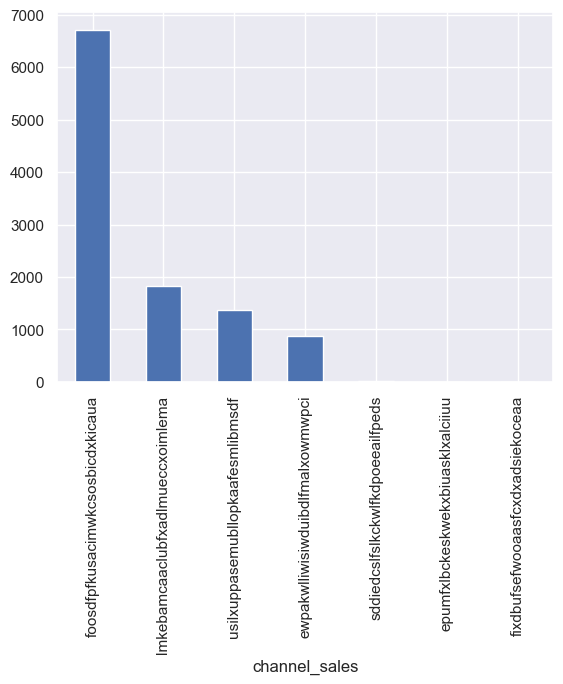

In [20]:
client_df["channel_sales"].value_counts().plot(kind='bar')

<Axes: xlabel='origin_up'>

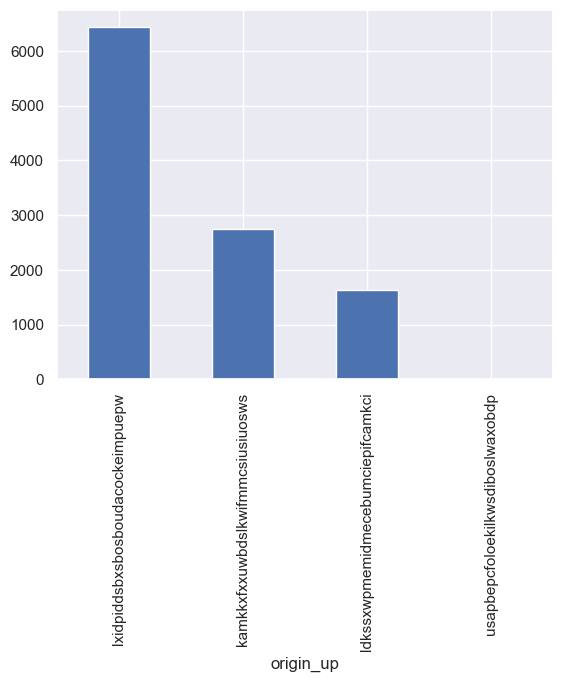

In [21]:
client_df["origin_up"].value_counts().plot(kind='bar')

### Continuous data

Descriptive statistics for continuous data provide insights into the distribution characteristics of each variable.

**Main takeaways**:
- Only a handful of variables exhibit a normal distribution—for example, `price_off_peak_fix`, `price_off_peak_var`, and to a lesser extent, `forecast_cons_12m`. This is suggested by the close alignment between their mean and median (the 50th percentile).
- In contrast, the majority of variables show a significant rightward skew, evidenced by their means being considerably higher than their medians.

The above implies that applying logarithmic transformations to the data could be beneficial during model training to mitigate the skewness and potentially improve model performance.

In [22]:
client_df.describe(include=["Int64","Float64"])

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,10811.0,10811.0,10811.0,10811.0,10811.0,10811.0,10811.0,10811.0,10811.0,10811.0,10811.0,10811.0,10811.0,10811.0,10811.0,10811.0,10811.0
mean,175146.434095,28503.548608,17520.953658,1911.410965,1393.422718,1.075016,62.881922,0.138369,0.04992,43.218251,154.975558,25.306819,25.303301,1.277033,195.428611,4.940431,18.006408
std,613124.462955,170353.956166,68236.630263,2378.159022,2860.825113,5.355366,65.584807,0.022877,0.049374,2.942498,318.078616,21.033004,21.031968,0.680594,340.536812,1.218787,12.834328
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.3
25%,5894.5,0.0,0.0,520.33,0.0,0.0,16.19,0.116509,0.0,40.606701,0.0,14.64,14.64,1.0,52.655,4.0,13.0
50%,14973.0,0.0,847.0,1161.77,343.0,0.0,18.88,0.143166,0.083849,44.311378,42.48,22.21,22.21,1.0,116.88,5.0,13.856
75%,44209.0,0.0,3632.5,2482.125,1759.5,0.0,130.43,0.146348,0.098861,44.311378,197.495,30.22,30.22,1.0,252.405,6.0,19.05
max,6207104.0,4154590.0,771203.0,82902.83,79127.0,30.0,599.31,0.273963,0.168092,59.266378,9682.89,314.76,314.76,32.0,24570.65,11.0,320.0


In [23]:
price_df.describe(include=["Int64","Float64"])

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.0,193002.0,193002.0,193002.0,193002.0,193002.0
mean,0.141027,0.05463,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.125976,0.0,0.0,40.728885,0.0,0.0
50%,0.146033,0.085483,0.0,44.26693,0.0,0.0
75%,0.151635,0.101673,0.072558,44.44471,24.339581,16.226389
max,0.2807,0.229788,0.114102,59.44471,36.490692,17.458221


### Date Data Analysis

**Key Points:**

* Both datasets (`price_df` and `client_df`) contain overlapping date ranges, which allows us to join them for analysis within specific time frames.
* However, there's a crucial difference in date coverage. `price_df` only has price data for 2015, while `client_df` covers a broader range from 2005 to 2016.
* To ensure accurate customer churn analysis when joining the data, we need to subset `client_df` first. This subset should include only clients with contracts active during 2015, matching the time frame of `price_df`.


In [24]:
client_df.describe(include=["datetime"])

,date_activ,date_end,date_modif_prod,date_renewal
count,10811,10811,10811,10811
mean,2011-08-10 20:20:29.414485248,2016-07-22 20:45:15.900471808,2013-05-15 10:36:33.099620608,2015-07-15 21:54:55.643326208
min,2005-02-25 00:00:00,2016-01-28 00:00:00,2005-02-25 00:00:00,2013-06-26 00:00:00
25%,2010-07-21 00:00:00,2016-04-24 00:00:00,2011-07-08 12:00:00,2015-04-13 00:00:00
50%,2011-11-17 00:00:00,2016-07-16 00:00:00,2013-10-30 00:00:00,2015-07-09 00:00:00
75%,2012-07-03 00:00:00,2016-10-24 00:00:00,2015-06-16 00:00:00,2015-10-23 00:00:00
max,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00


In [25]:
price_df.describe(include=["datetime"])

,price_date
count,193002
mean,2015-06-16 12:50:49.933161216
min,2015-01-01 00:00:00
25%,2015-04-01 00:00:00
50%,2015-07-01 00:00:00
75%,2015-10-01 00:00:00
max,2015-12-01 00:00:00


---

## Data visualization

We focus on our two main variables of interest: churn and price

### Churn Rate
We start by exploring the prevalence of churn among the users of PowerCo. 

**Prevalence:**  The graph below shows that over ~10% of PowerCo's users churned (canceled service) in the last 3 months. This implies a potential for unbalanced data during our modeling stage, where churned users are a smaller proportion compared to non-churned users.

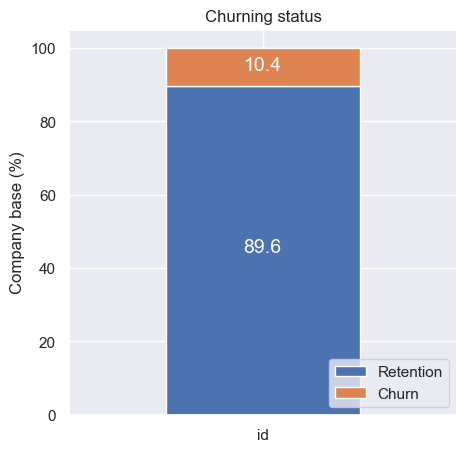

In [26]:
churn = client_df[["id", "churn"]]
churn.columns = ["id", 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
data_visualization.plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")
plt.ylabel("Company base (%)")
plt.show()

**Impact: What is at stake?**  The churned users, though a minority, contribute significantly to PowerCo's profits. The graph below shows that they account for 13% of the company's net margin.

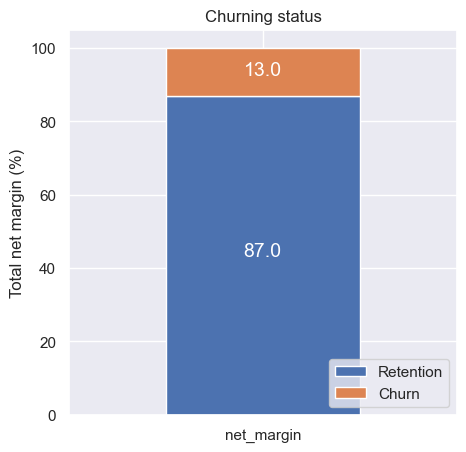

In [27]:
churn = client_df[["net_margin", "churn"]]
churn.columns = ["net_margin", 'churn']
churn_total = churn.groupby(churn['churn']).sum()
churn_percentage = churn_total / churn_total.sum() * 100
data_visualization.plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")
plt.ylabel("Total net margin (%)")
plt.show()

**Churn by Customer Profile:**

* **Consumption:** Churn is slightly higher among electricity users (~5%) compared to gas users (~3.5%) as shown in the charts below. We should incorporate user type (electricity vs. gas) into our modeling phase.

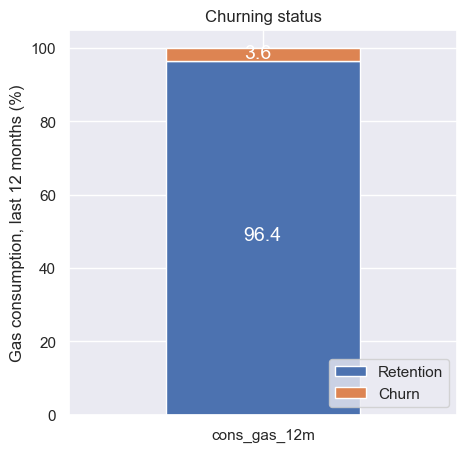

In [28]:
churn = client_df.loc[client_df["has_gas"]==1][["cons_gas_12m", "churn"]]
churn.columns = ["cons_gas_12m", 'churn']
churn_total = churn.groupby(churn['churn']).sum()
churn_percentage = churn_total / churn_total.sum() * 100
data_visualization.plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")
plt.ylabel("Gas consumption, last 12 months (%)")
plt.show()

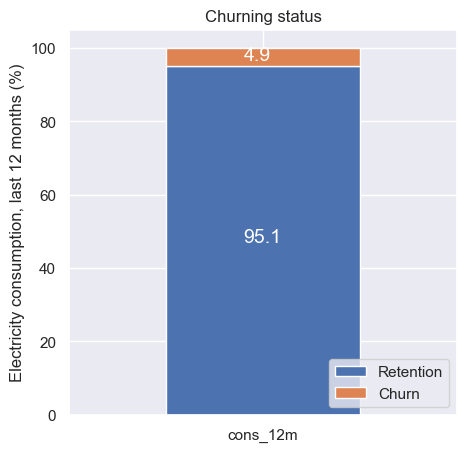

In [29]:
churn = client_df[["cons_12m", "churn"]]
churn.columns = ["cons_12m", 'churn']
churn_total = churn.groupby(churn['churn']).sum()
churn_percentage = churn_total / churn_total.sum() * 100
data_visualization.plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")
plt.ylabel("Electricity consumption, last 12 months (%)")
plt.show()

* **Tenure:** The graph below reveals that most churned users had been with the company for 4 to 6 years. Therefore, we should incorporate tenure into our model to identify customers at higher churn risk based on their time with the company.

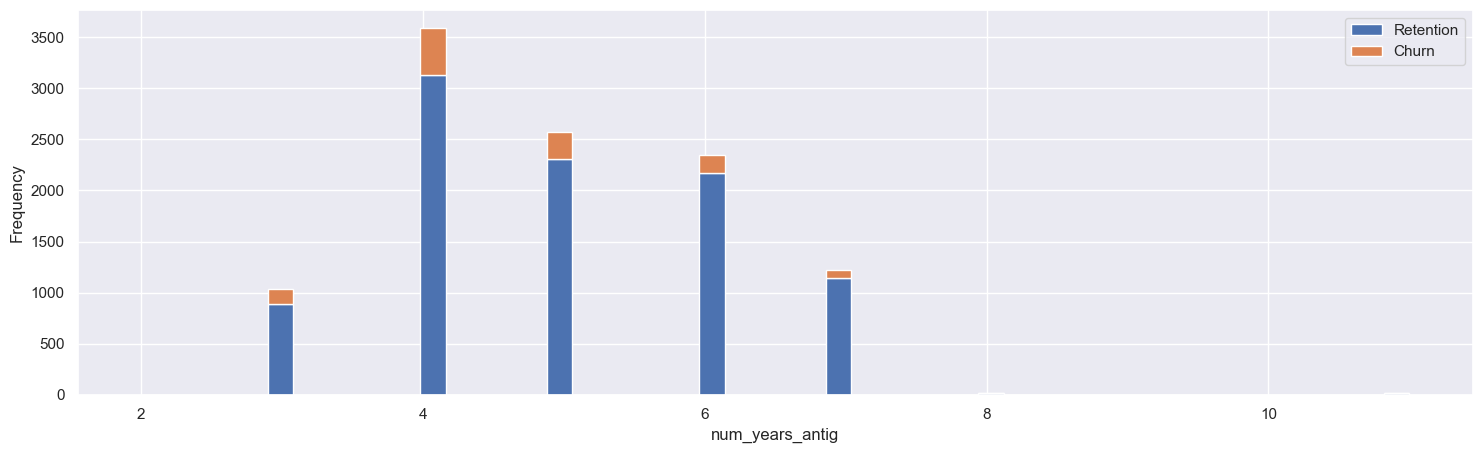

In [30]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))
data_visualization.plot_distribution(client_df, 'num_years_antig', axs)

### Price Trends

**Time Series Exploratory Analysis:** We plot below the average monthly energy and power prices over time. The plot shows relative stability in prices, with a slight decrease in peak and off-peak energy prices at the beginning of Q3 2015. This stability suggests that price might not be a major driver of user churn.  Factors such as volume of consumption or changes in service plans might be more influential.

**Off-Peak Pricing Anomaly:** Interestingly, off-peak prices (`price_off_peak`) are consistently higher than peak prices (`price_peak`) in both energy and power markets. While this may seem counterintuitive, further investigation and domain knowledge is needed to understand the reason behind this pricing structure.

In [31]:
# prepare the data
price_tmp = price_df.drop(columns=["id"])
price_tmp.sort_values(by=["price_date"])
price_tmp["price_date_ym"] = price_tmp["price_date"].dt.to_period('M')
price_tmp = price_tmp.drop(columns=["price_date"]).copy()
cols_num_price = list(price_tmp.select_dtypes(include=["Int64","Float64"]).columns)
dat = price_tmp.groupby("price_date_ym")
price_df_ts = pd.concat([dat[cols_num_price].mean()], axis=1)
# Convert Period to datetime for seaborn
price_df_ts.index = price_df_ts.index.to_timestamp()
price_df_ts.head(3)

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
price_date_ym,,,,,,
2015-01-01,0.142568,0.05495,0.030333,43.226643,10.692921,6.455861
2015-02-01,0.142767,0.055053,0.030367,43.238161,10.673719,6.449016
2015-03-01,0.143104,0.055118,0.030396,43.254033,10.644489,6.430121


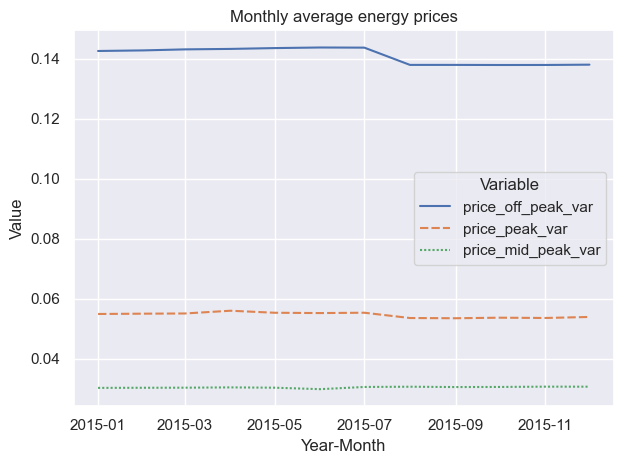

In [32]:
pd.option_context('mode.use_inf_as_na', True)
sns.lineplot(data=price_df_ts[["price_off_peak_var","price_peak_var","price_mid_peak_var"]])
plt.xlabel('Year-Month')  # Set x-axis label
plt.ylabel('Value')  # Set y-axis label
plt.title('Monthly average energy prices')  # Set plot title
plt.legend(title='Variable')  # Customize legend
plt.tight_layout()  # Adjust spacing for better visualization (optional)
plt.show()

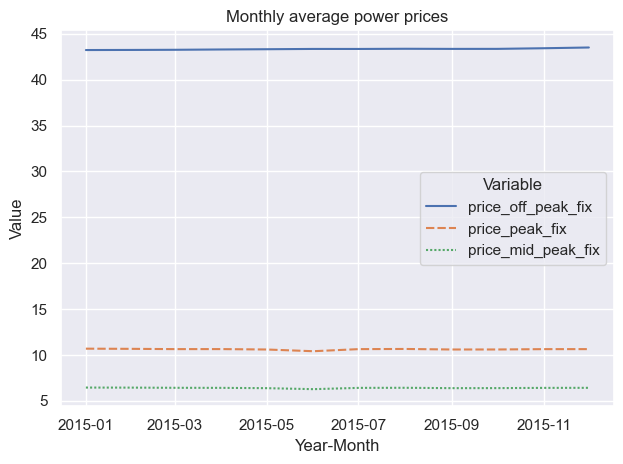

In [33]:
sns.lineplot(data=price_df_ts[["price_off_peak_fix","price_peak_fix","price_mid_peak_fix"]])
plt.xlabel('Year-Month')  # Set x-axis label
plt.ylabel('Value')  # Set y-axis label
plt.title('Monthly average power prices')  # Set plot title
plt.legend(title='Variable')  # Customize legend
plt.tight_layout()  # Adjust spacing for better visualization (optional)
plt.show()